# Machine Learning Basics: Iris Classification

## Overview
This notebook demonstrates a simple machine learning workflow using the famous Iris dataset. We'll build a model that can automatically identify iris flower species based on physical measurements.

## The Problem
Imagine you're a botanist who finds an iris flower and measures:
- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)

**Goal:** Predict which of the 3 iris species it belongs to:
- Iris Setosa
- Iris Versicolor
- Iris Virginica

## Why Machine Learning?
Instead of manually creating rules, we'll let the model **learn patterns** from 150 known examples, then use those patterns to classify new flowers automatically.

## Dataset
- **Size:** 150 flowers (50 of each species)
- **Features:** 4 measurements per flower
- **Target:** Species classification (3 classes)
- **Source:** Built into scikit-learn (no external files needed)

#### Statistical overview of the dataset

Dataset shape: (150, 4)
Number of samples: 150
Number of features: 4
Species: ['setosa' 'versicolor' 'virginica']
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
species
setosa        50
versicolor    50
virginica     50
dtype: 

<Figure size 1200x800 with 0 Axes>

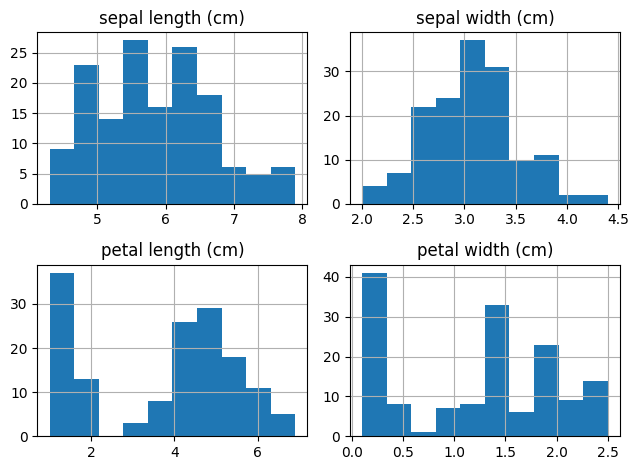

In [6]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import scipy

# Load the Iris dataset
iris = load_iris()
X = iris.data      # Features: the 4 measurements
y = iris.target    # Labels: species (0, 1, or 2)

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]

# Display basic information
print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {len(X)}")
print(f"Number of features: {X.shape[1]}")
print(f"Species: {iris.target_names}")
print(df.describe())
print(df.groupby('species').size())
print("\nDistribution of length values")
plt.figure(figsize=(12, 8))
df.hist()
plt.tight_layout()
plt.show()


### The first rows of the dataset

In [8]:
df.head(20)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
